In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer,classification_report,roc_auc_score,plot_precision_recall_curve,plot_confusion_matrix,precision_score,recall_score,f1_score,accuracy_score,roc_curve,auc
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.utils import shuffle

In [2]:
df = pd.read_csv("./Data_clean/min_max_both_inter_scaled.csv")

In [3]:
df.shape

(40256, 1036)

In [4]:
df

,CONS_NO,FLAG,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,...,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31
0,0387DD8A07E07FDA6271170F86AD9151,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.264158,0.296902,0.297637,0.350616,0.201613,0.321919,0.342154,0.277402,0.337003,0.247970
1,4B75AC4F2D8434CFF62DB64D0BB43103,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.333740,0.547089,0.543432,0.527583,0.653459,0.581835,0.565681,0.495276,0.432795,0.416336
2,B32AC8CC6D5D805AC053557AB05F5343,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.242798,0.286581,0.327142,0.282600,0.371304,0.394049,0.340220,0.365049,0.274071,0.222138
3,EDFC78B07BA2908B3395C4EB2304665E,1,0.048145,0.112494,0.144199,0.058008,0.064819,0.105683,0.091123,0.066463,...,0.313762,0.220056,0.178957,0.123532,0.123297,0.138093,0.156646,0.235791,0.211602,0.184829
4,6BCFD78138BC72A9BA1BFB0B79382192,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.147734,0.174809,0.172454,0.043555,0.024132,0.024720,0.112419,0.024720,0.022366,0.035903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40251,F1472871E1AFF49D4289564B6377D76C,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.288360,0.273369,0.242504,0.265432,0.263668,0.249559,0.223986,0.299824,0.316578,0.223986
40252,F3C8BBCD2DC26C1E0249DEEF6A4256B7,0,0.164334,0.000000,0.000000,0.348144,0.368229,0.353621,0.186853,0.245892,...,0.233719,0.402921,0.189897,0.314060,0.220329,0.282410,0.225806,0.378576,0.368229,0.290323
40253,A9A0FE83467A680FBFB0DBFC910DF227,0,0.048013,0.096026,0.076159,0.081126,0.127483,0.114238,0.073675,0.057947,...,0.081954,0.050497,0.053808,0.045530,0.040563,0.042219,0.065397,0.054636,0.032285,0.053808
40254,D9A6ADA018FA46A55D5438370456AA45,0,0.349472,0.313470,0.398924,0.355680,0.347610,0.361680,0.369543,0.496379,...,0.323609,0.340989,0.269812,0.214980,0.248293,0.230706,0.252845,0.272295,0.275812,0.214980


<AxesSubplot:xlabel='FLAG', ylabel='count'>

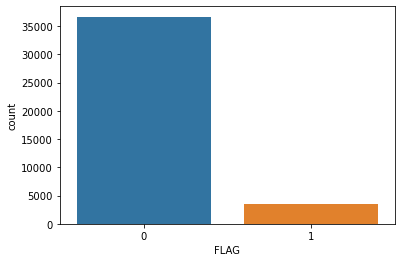

In [5]:
sns.countplot(x= df["FLAG"])

In [6]:
model_regres = DecisionTreeClassifier() 

In [7]:
model_regres.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [8]:
"""grid_dtree = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid={"class_weight":[{0:1,1:v} for v in range(2,5)],
    "max_depth":[2,3,4,5,6],
    "min_samples_leaf":[10,15]
               },
     scoring={"precision": make_scorer(precision_score),
            "recall":make_scorer(recall_score),
            "f1_score":make_scorer(f1_score),
           "roc_auc_score":make_scorer(roc_auc_score)
            },
    refit="roc_auc_score",
    return_train_score=True,
    verbose=1,
    cv=3,
    n_jobs=-1
    
    
                            )
                            """"

SyntaxError: EOL while scanning string literal (Temp/ipykernel_13924/4247290008.py, line 20)

In [10]:
y = df["FLAG"]

In [11]:
X = df.drop(["CONS_NO","FLAG"],axis=1)

# Don't touch the ones here .. its for reference

In [40]:
grid_dtree.fit(X,y)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: 2}, {0: 1, 1: 3},
                                          {0: 1, 1: 4}],
                         'max_depth': [2, 3, 4, 5, 6],
                         'min_samples_leaf': [10, 15]},
             refit='roc_auc_score', return_train_score=True,
             scoring={'f1_score': make_scorer(f1_score),
                      'precision': make_scorer(precision_score),
                      'recall': make_scorer(recall_score),
                      'roc_auc_score': make_scorer(roc_auc_score)},
             verbose=1)

In [44]:
 results = pd.DataFrame(grid_dtree.cv_results_)

In [46]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,param_max_depth,param_min_samples_leaf,params,split0_test_precision,split1_test_precision,...,split1_test_roc_auc_score,split2_test_roc_auc_score,mean_test_roc_auc_score,std_test_roc_auc_score,rank_test_roc_auc_score,split0_train_roc_auc_score,split1_train_roc_auc_score,split2_train_roc_auc_score,mean_train_roc_auc_score,std_train_roc_auc_score
0,7.172992,0.184489,0.114288,0.006164,"{0: 1, 1: 2}",2,10,"{'class_weight': {0: 1, 1: 2}, 'max_depth': 2,...",0.000000,0.000000,...,0.500000,0.500000,0.500000,0.000000,25,0.500000,0.500000,0.500000,0.500000,0.000000
1,7.189961,0.106716,0.115318,0.014865,"{0: 1, 1: 2}",2,15,"{'class_weight': {0: 1, 1: 2}, 'max_depth': 2,...",0.000000,0.000000,...,0.500000,0.500000,0.500000,0.000000,25,0.500000,0.500000,0.500000,0.500000,0.000000
2,10.848430,0.083067,0.109695,0.000245,"{0: 1, 1: 2}",3,10,"{'class_weight': {0: 1, 1: 2}, 'max_depth': 3,...",0.000000,0.279412,...,0.505959,0.500000,0.501986,0.002809,23,0.500000,0.508704,0.500000,0.502901,0.004103
3,11.010794,0.242498,0.101142,0.006287,"{0: 1, 1: 2}",3,15,"{'class_weight': {0: 1, 1: 2}, 'max_depth': 3,...",0.000000,0.279412,...,0.505959,0.500000,0.501986,0.002809,23,0.500000,0.508704,0.500000,0.502901,0.004103
4,15.212731,1.103740,0.120544,0.007478,"{0: 1, 1: 2}",4,10,"{'class_weight': {0: 1, 1: 2}, 'max_depth': 4,...",0.217391,0.344262,...,0.507165,0.532085,0.513537,0.013328,21,0.505315,0.512522,0.551217,0.523018,0.020155
5,16.711038,1.699763,0.130742,0.059396,"{0: 1, 1: 2}",4,15,"{'class_weight': {0: 1, 1: 2}, 'max_depth': 4,...",0.217391,0.384615,...,0.507074,0.532085,0.513506,0.013343,22,0.505315,0.511428,0.551217,0.522653,0.020351
6,19.117057,0.680824,0.100005,0.006682,"{0: 1, 1: 2}",5,10,"{'class_weight': {0: 1, 1: 2}, 'max_depth': 5,...",0.298354,0.303719,...,0.547827,0.542970,0.545874,0.002094,16,0.564985,0.568512,0.579562,0.571020,0.006210
7,19.094595,0.536799,0.097336,0.004643,"{0: 1, 1: 2}",5,15,"{'class_weight': {0: 1, 1: 2}, 'max_depth': 5,...",0.298354,0.307385,...,0.550352,0.542510,0.546563,0.003207,15,0.564566,0.570490,0.577743,0.570933,0.005389
8,20.275631,0.274355,0.089001,0.000814,"{0: 1, 1: 2}",6,10,"{'class_weight': {0: 1, 1: 2}, 'max_depth': 6,...",0.283276,0.331361,...,0.537698,0.560981,0.550358,0.009614,12,0.597006,0.564756,0.608123,0.589962,0.018392
9,20.963952,0.395553,0.100333,0.008179,"{0: 1, 1: 2}",6,15,"{'class_weight': {0: 1, 1: 2}, 'max_depth': 6,...",0.286957,0.339339,...,0.538362,0.563270,0.551340,0.010196,9,0.593582,0.561526,0.610474,0.588527,0.020300


In [84]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.40)

In [85]:
model_regres.fit(x_train,y_train)

KeyboardInterrupt: 

In [ ]:
y_pred =model_regres.predict(x_test)

In [ ]:
print(classification_report(y_test,y_pred))

In [56]:
accuracy_score(y_test,y_pred)

0.8466124324660002

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix LDA@60
[[13348  1284]
 [ 1186   285]]
Normalized confusion matrix
[[0.91224713 0.08775287]
 [0.80625425 0.19374575]]


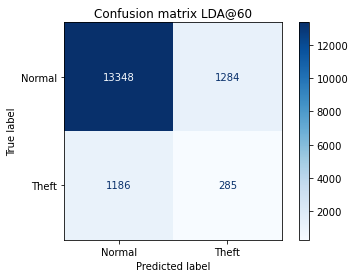

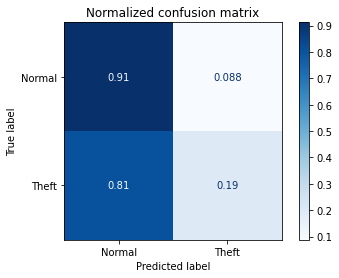

In [58]:
#plotting non-normalized confusion matrix

titles = [("Confusion matrix LDA@60",None),
         ("Normalized confusion matrix","true")]

for title , normalized in titles:
    disp =plot_confusion_matrix(model_regres,x_test,y_test,
                               display_labels=["Normal","Theft"],
                               cmap=plt.cm.Blues,
                               normalize=normalized)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    
plt.show()

In [59]:
model_rand = RandomForestClassifier()

In [60]:
model_rand.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [61]:
grid_randfor= GridSearchCV(
    estimator=RandomForestClassifier(verbose=1),
    param_grid={"class_weight":[{0:1,1:v} for v in range(2,8)],
            "min_samples_leaf":[10,15],
            'n_estimators': [10,20,30,40,50,100],
            
           },
    scoring={"precision": make_scorer(precision_score),
            "recall":make_scorer(recall_score),
            "f1_score":make_scorer(f1_score),
           "roc_auc_score":make_scorer(roc_auc_score)
            },
    refit="roc_auc_score",
    return_train_score=True,
    verbose=1,
    cv=3,
    n_jobs=-1)

In [63]:
grid_randfor.fit(X,y)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   42.0s finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(verbose=1), n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: 2}, {0: 1, 1: 3},
                                          {0: 1, 1: 4}, {0: 1, 1: 5},
                                          {0: 1, 1: 6}, {0: 1, 1: 7}],
                         'min_samples_leaf': [10, 15],
                         'n_estimators': [10, 20, 30, 40, 50, 100]},
             refit='roc_auc_score', return_train_score=True,
             scoring={'f1_score': make_scorer(f1_score),
                      'precision': make_scorer(precision_score),
                      'recall': make_scorer(recall_score),
                      'roc_auc_score': make_scorer(roc_auc_score)},
             verbose=1)

In [64]:
results = pd.DataFrame(grid_randfor.cv_results_)

In [65]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,param_min_samples_leaf,param_n_estimators,params,split0_test_precision,split1_test_precision,...,split1_test_roc_auc_score,split2_test_roc_auc_score,mean_test_roc_auc_score,std_test_roc_auc_score,rank_test_roc_auc_score,split0_train_roc_auc_score,split1_train_roc_auc_score,split2_train_roc_auc_score,mean_train_roc_auc_score,std_train_roc_auc_score
0,8.571523,0.065327,0.168335,0.002214,"{0: 1, 1: 2}",10,10,"{'class_weight': {0: 1, 1: 2}, 'min_samples_le...",0.579710,0.571429,...,0.540398,0.532997,0.534850,0.003994,61,0.663765,0.661940,0.670614,0.665440,0.003734
1,16.639040,0.789574,0.231097,0.016850,"{0: 1, 1: 2}",10,20,"{'class_weight': {0: 1, 1: 2}, 'min_samples_le...",0.788235,0.650000,...,0.530973,0.527037,0.528452,0.001787,66,0.645483,0.650824,0.656339,0.650882,0.004432
2,24.292052,1.140086,0.277419,0.008584,"{0: 1, 1: 2}",10,30,"{'class_weight': {0: 1, 1: 2}, 'min_samples_le...",0.685393,0.640000,...,0.531689,0.529286,0.528465,0.003023,65,0.638189,0.643489,0.650303,0.643994,0.004958
3,32.729306,0.646636,0.343744,0.001209,"{0: 1, 1: 2}",10,40,"{'class_weight': {0: 1, 1: 2}, 'min_samples_le...",0.781609,0.663934,...,0.532271,0.528438,0.529477,0.001997,63,0.640474,0.640515,0.641772,0.640920,0.000603
4,41.007770,1.448256,0.415251,0.011162,"{0: 1, 1: 2}",10,50,"{'class_weight': {0: 1, 1: 2}, 'min_samples_le...",0.708861,0.634146,...,0.530850,0.525300,0.526227,0.003460,72,0.631652,0.638378,0.641624,0.637218,0.004153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,15.997880,0.668186,0.236003,0.011345,"{0: 1, 1: 7}",15,20,"{'class_weight': {0: 1, 1: 7}, 'min_samples_le...",0.420168,0.426386,...,0.581193,0.566370,0.573366,0.006080,2,0.870693,0.875972,0.885786,0.877484,0.006254
68,22.547865,1.074033,0.303361,0.006763,"{0: 1, 1: 7}",15,30,"{'class_weight': {0: 1, 1: 7}, 'min_samples_le...",0.450472,0.444915,...,0.577299,0.565675,0.571165,0.004767,5,0.890580,0.891812,0.884820,0.889071,0.003047
69,30.051928,1.233265,0.355337,0.006130,"{0: 1, 1: 7}",15,40,"{'class_weight': {0: 1, 1: 7}, 'min_samples_le...",0.481481,0.460526,...,0.577953,0.574160,0.573458,0.003987,1,0.890826,0.895809,0.891618,0.892751,0.002186
70,35.887946,1.521544,0.383999,0.015520,"{0: 1, 1: 7}",15,50,"{'class_weight': {0: 1, 1: 7}, 'min_samples_le...",0.509642,0.479319,...,0.573813,0.567434,0.570501,0.002610,7,0.901109,0.895344,0.899387,0.898613,0.002416


# building Different classifiers for the model using the different data things

In [16]:
X

,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,2014-01-09,2014-01-10,...,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.264158,0.296902,0.297637,0.350616,0.201613,0.321919,0.342154,0.277402,0.337003,0.247970
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.333740,0.547089,0.543432,0.527583,0.653459,0.581835,0.565681,0.495276,0.432795,0.416336
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.242798,0.286581,0.327142,0.282600,0.371304,0.394049,0.340220,0.365049,0.274071,0.222138
3,0.048145,0.112494,0.144199,0.058008,0.064819,0.105683,0.091123,0.066463,0.062940,0.060357,...,0.313762,0.220056,0.178957,0.123532,0.123297,0.138093,0.156646,0.235791,0.211602,0.184829
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.147734,0.174809,0.172454,0.043555,0.024132,0.024720,0.112419,0.024720,0.022366,0.035903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40251,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.288360,0.273369,0.242504,0.265432,0.263668,0.249559,0.223986,0.299824,0.316578,0.223986
40252,0.164334,0.000000,0.000000,0.348144,0.368229,0.353621,0.186853,0.245892,0.345709,0.267194,...,0.233719,0.402921,0.189897,0.314060,0.220329,0.282410,0.225806,0.378576,0.368229,0.290323
40253,0.048013,0.096026,0.076159,0.081126,0.127483,0.114238,0.073675,0.057947,0.101821,0.069536,...,0.081954,0.050497,0.053808,0.045530,0.040563,0.042219,0.065397,0.054636,0.032285,0.053808
40254,0.349472,0.313470,0.398924,0.355680,0.347610,0.361680,0.369543,0.496379,0.255328,0.286365,...,0.323609,0.340989,0.269812,0.214980,0.248293,0.230706,0.252845,0.272295,0.275812,0.214980


In [17]:
X = np.array(X.values)

In [18]:
y = np.array(y.values)

## spliting the data 80 @ 20 without smote

In [19]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [20]:
model_rand = RandomForestClassifier(n_jobs=-1)

In [21]:
model_rand.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [22]:
model_rand.fit(X_train,y_train)

RandomForestClassifier(n_jobs=-1)

In [23]:
y_pred = model_rand.predict(X_test)

In [24]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      7312
           1       0.71      0.06      0.11       740

    accuracy                           0.91      8052
   macro avg       0.81      0.53      0.53      8052
weighted avg       0.89      0.91      0.88      8052



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix Split@20
[[7294   18]
 [ 696   44]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Normalized confusion matrix
[[0.99753829 0.00246171]
 [0.94054054 0.05945946]]


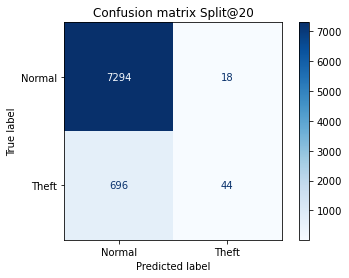

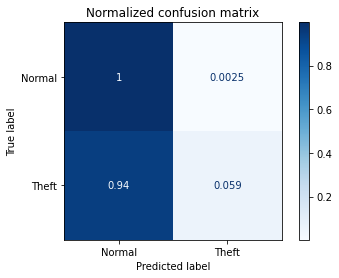

In [25]:
#plotting non-normalized confusion matrix

titles = [("Confusion matrix RF@20",None),
         ("Normalized confusion matrix","true")]

for title , normalized in titles:
    disp =plot_confusion_matrix(model_rand,X_test,y_test,
                               display_labels=["Normal","Theft"],
                               cmap=plt.cm.Blues,
                               normalize=normalized)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    
plt.show()

In [26]:
roc_auc_score(y_test,y_pred)

0.5284988763380448

In [27]:
probs = model_rand.predict_proba(X_test)
preds = probs[:,1]
fpr,tpr,thresold = roc_curve(y_test,preds)
roc_auc = auc(fpr,tpr)

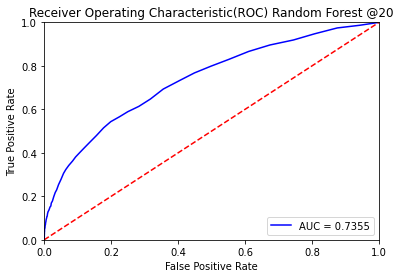

In [28]:
plt.title("Receiver Operating Characteristic(ROC) Random Forest @80")
plt.plot(fpr,tpr,"b",label="AUC = %0.4f" %roc_auc)
plt.legend(loc= "lower right")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

## spliting the data 60 @ 40 without smote

In [29]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [30]:
model_rand.fit(X_train,y_train)

RandomForestClassifier(n_jobs=-1)

In [31]:
y_pred = model_rand.predict(X_test)

In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.95     14685
           1       0.68      0.04      0.08      1418

    accuracy                           0.91     16103
   macro avg       0.80      0.52      0.52     16103
weighted avg       0.89      0.91      0.88     16103



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix Split@20
[[14658    27]
 [ 1361    57]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Normalized confusion matrix
[[0.99816139 0.00183861]
 [0.95980254 0.04019746]]


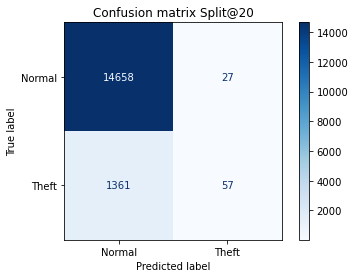

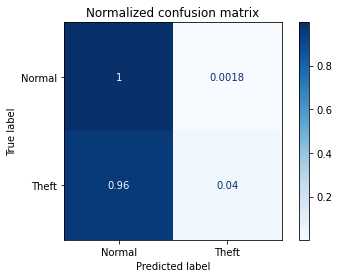

In [33]:
#plotting non-normalized confusion matrix

titles = [("Confusion matrix Split@20",None),
         ("Normalized confusion matrix","true")]

for title , normalized in titles:
    disp =plot_confusion_matrix(model_rand,X_test,y_test,
                               display_labels=["Normal","Theft"],
                               cmap=plt.cm.Blues,
                               normalize=normalized)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    
plt.show()

In [34]:
roc_auc_score(y_test,y_pred)

0.5191794251928006

In [35]:
probs = model_rand.predict_proba(X_test)
preds = probs[:,1]
fpr,tpr,thresold = roc_curve(y_test,preds)
roc_auc = auc(fpr,tpr)

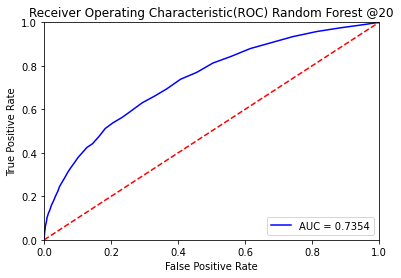

In [36]:
plt.title("Receiver Operating Characteristic(ROC) Random Forest @20")
plt.plot(fpr,tpr,"b",label="AUC = %0.4f" %roc_auc)
plt.legend(loc= "lower right")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

## spliting the data Decision Tree modification 

In [37]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [38]:
model_rand1 = RandomForestClassifier()

In [39]:
model_rand1.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [40]:
model_rand.fit(X_train,y_train)

RandomForestClassifier(n_jobs=-1)

In [41]:
y_pred = model_rand.predict(X_test)

In [42]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      7312
           1       0.79      0.06      0.11       740

    accuracy                           0.91      8052
   macro avg       0.85      0.53      0.53      8052
weighted avg       0.90      0.91      0.88      8052



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix Split@20
[[7301   11]
 [ 698   42]]
Normalized confusion matrix
[[0.99849562 0.00150438]
 [0.94324324 0.05675676]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


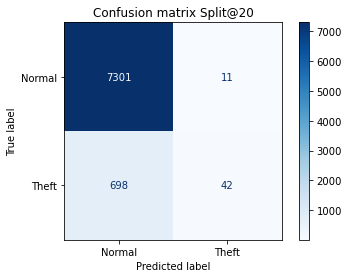

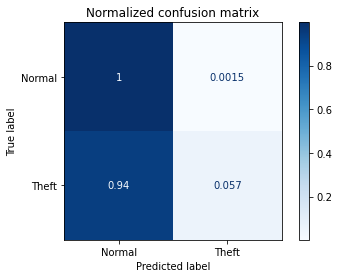

In [43]:
#plotting non-normalized confusion matrix

titles = [("Confusion matrix Split@20",None),
         ("Normalized confusion matrix","true")]

for title , normalized in titles:
    disp =plot_confusion_matrix(model_rand,X_test,y_test,
                               display_labels=["Normal","Theft"],
                               cmap=plt.cm.Blues,
                               normalize=normalized)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    
plt.show()

In [44]:
roc_auc_score(y_test,y_pred)

0.5276261901945709

In [45]:
probs = model_rand.predict_proba(X_test)
preds = probs[:,1]
fpr,tpr,thresold = roc_curve(y_test,preds)
roc_auc = auc(fpr,tpr)

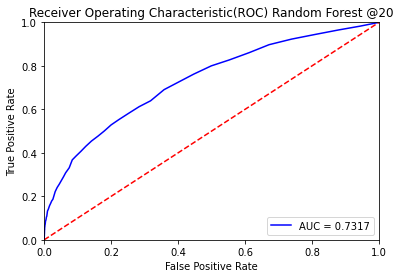

In [46]:
plt.title("Receiver Operating Characteristic(ROC) Random Forest @20")
plt.plot(fpr,tpr,"b",label="AUC = %0.4f" %roc_auc)
plt.legend(loc= "lower right")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

# using over_sampling techniques

In [12]:
#oversampling of minority class (imbalanced learning)
over = SMOTE(sampling_strategy=0.2,random_state=0)
over_x_train,over_y_train = over.fit_resample(X,y)

In [13]:
 X_train, X_test, y_train, y_test = train_test_split(over_x_train, over_y_train, test_size=0.2, random_state=0)

In [15]:
model_rand = RandomForestClassifier()

In [16]:
model_rand.fit(X_train,y_train)

RandomForestClassifier()

In [17]:
y_pred = model_rand.predict(X_test)

In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      7312
           1       0.93      0.39      0.55      1491

    accuracy                           0.89      8803
   macro avg       0.91      0.69      0.75      8803
weighted avg       0.90      0.89      0.87      8803



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix RF@80
[[7271   41]
 [ 903  588]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Normalized confusion matrix
[[0.99439278 0.00560722]
 [0.6056338  0.3943662 ]]


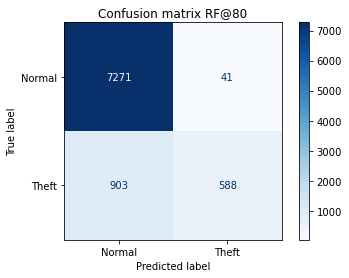

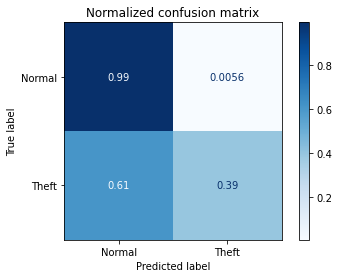

In [19]:
#plotting non-normalized confusion matrix

titles = [("Confusion matrix RF@80",None),
         ("Normalized confusion matrix","true")]

for title , normalized in titles:
    disp =plot_confusion_matrix(model_rand,X_test,y_test,
                               display_labels=["Normal","Theft"],
                               cmap=plt.cm.Blues,
                               normalize=normalized)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    
plt.show()

In [20]:
roc_auc_score(y_test,y_pred)

0.694379488088267

In [21]:
probs = model_rand.predict_proba(X_test)
preds = probs[:,1]
fpr,tpr,thresold = roc_curve(y_test,preds)
roc_auc = auc(fpr,tpr)

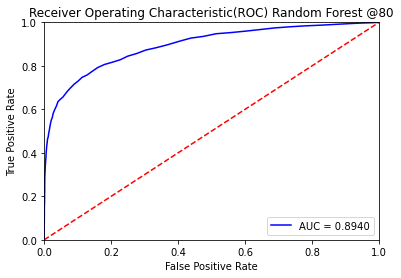

In [22]:
plt.title("Receiver Operating Characteristic(ROC) Random Forest @80")
plt.plot(fpr,tpr,"b",label="AUC = %0.4f" %roc_auc)
plt.legend(loc= "lower right")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

### equal percentage
influence of  the data equivalence

In [56]:
flag_1_calc = df.loc[df["FLAG"]==1]

In [57]:
flag_0_calc = df.loc[df["FLAG"]==0]

In [58]:
len(flag_1_calc)

3579

In [59]:
flag_sample_0= flag_0_calc.sample(3*len(flag_1_calc))

In [60]:
frames = [flag_1_calc,flag_sample_0]

In [61]:
res_df=pd.concat(frames)

In [62]:
shuf_df= shuffle(res_df,random_state=0)

In [63]:
X= shuf_df.drop(["CONS_NO","FLAG"],axis=1)

In [64]:
y= shuf_df.FLAG

In [65]:
X = np.array(X.values)

In [66]:
y = np.array(y.values)

In [67]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [68]:
model_rand.fit(X_train,y_train)

RandomForestClassifier(n_jobs=-1)

In [69]:
y_pred = model_rand.predict(X_test)

In [70]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.97      0.87      2142
           1       0.69      0.19      0.30       722

    accuracy                           0.77      2864
   macro avg       0.74      0.58      0.58      2864
weighted avg       0.76      0.77      0.72      2864



Confusion matrix Split@20
[[2081   61]
 [ 586  136]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Normalized confusion matrix
[[0.97152194 0.02847806]
 [0.81163435 0.18836565]]


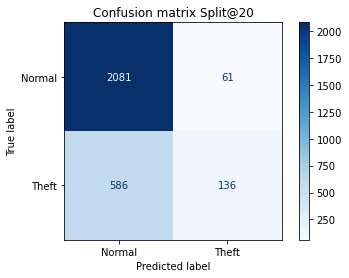

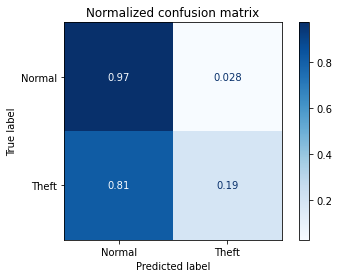

In [71]:
#plotting non-normalized confusion matrix

titles = [("Confusion matrix Split@20",None),
         ("Normalized confusion matrix","true")]

for title , normalized in titles:
    disp =plot_confusion_matrix(model_rand,X_test,y_test,
                               display_labels=["Normal","Theft"],
                               cmap=plt.cm.Blues,
                               normalize=normalized)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    
plt.show()

In [72]:
roc_auc_score(y_test,y_pred)

0.5799437965398533

In [73]:
probs = model_rand.predict_proba(X_test)
preds = probs[:,1]
fpr,tpr,thresold = roc_curve(y_test,preds)
roc_auc = auc(fpr,tpr)

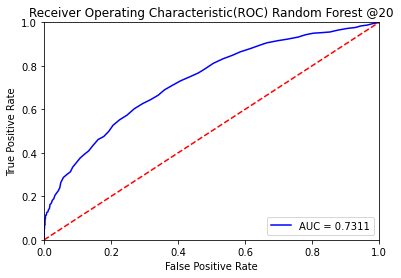

In [74]:
plt.title("Receiver Operating Characteristic(ROC) Random Forest @20")
plt.plot(fpr,tpr,"b",label="AUC = %0.4f" %roc_auc)
plt.legend(loc= "lower right")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

## spliting 60@40

In [76]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [77]:
model_rand.fit(X_train,y_train)

RandomForestClassifier(n_jobs=-1)

In [78]:
y_pred = model_rand.predict(X_test)

In [79]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.97      0.87      4300
           1       0.68      0.19      0.30      1427

    accuracy                           0.78      5727
   macro avg       0.73      0.58      0.58      5727
weighted avg       0.76      0.78      0.72      5727



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix Split@20
[[4175  125]
 [1157  270]]
Normalized confusion matrix
[[0.97093023 0.02906977]
 [0.81079187 0.18920813]]


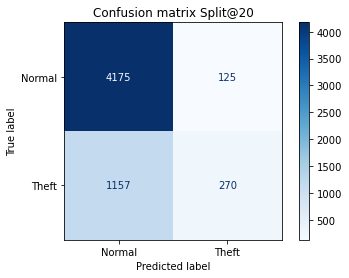

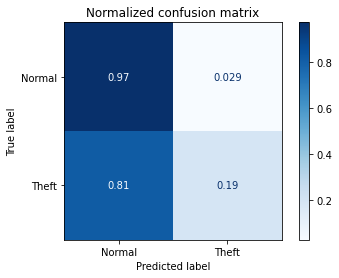

In [80]:
#plotting non-normalized confusion matrix

titles = [("Confusion matrix Split@20",None),
         ("Normalized confusion matrix","true")]

for title , normalized in titles:
    disp =plot_confusion_matrix(model_rand,X_test,y_test,
                               display_labels=["Normal","Theft"],
                               cmap=plt.cm.Blues,
                               normalize=normalized)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    
plt.show()

In [81]:
roc_auc_score(y_test,y_pred)

0.5800691807499878

In [82]:
probs = model_rand.predict_proba(X_test)
preds = probs[:,1]
fpr,tpr,thresold = roc_curve(y_test,preds)
roc_auc = auc(fpr,tpr)

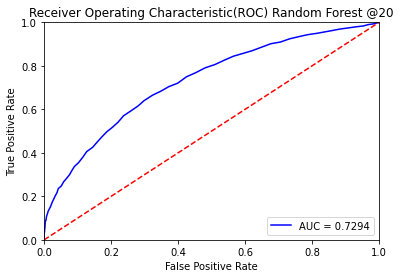

In [83]:
plt.title("Receiver Operating Characteristic(ROC) Random Forest @20")
plt.plot(fpr,tpr,"b",label="AUC = %0.4f" %roc_auc)
plt.legend(loc= "lower right")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()